In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

In [2]:
df = pd.read_json('./cleaningTest/train.json')

In [3]:
#Listing id is an arbitrary int label assined to each listing. not useful for classification
df.drop(['listing_id'], axis=1, inplace=True)

In [4]:
data = df.drop('interestVal', axis=1).select_dtypes(exclude=['object'])

In [5]:
equation = ('+').join(data.columns)

In [6]:
equation

'Balcony+Cats_Allowed+Common_Outdoor_Space+Dining_Room+Dishwasher+Dogs_Allowed+Doorman+Elevator+Exclusive+Fitness_Center+Garden_Patio+Hardwood_Floors+High_Speed_Internet+Laundry_in_Unit+New_Construction+No_Fee+Outdoor_Space+Pre_War+Roof_Deck+Swimming_Pool+Terrace+Wheelchair_Access+ada+apartment+avg_lux_score+avg_num_features+avg_num_luxury+avg_outdoor_score+avg_price_per_feature+avg_price_per_num_lux+bathrooms+bedrooms+condominium+door_excl+fitness_oriented+foundType+latitude+laundry_in_building+loft+longitude+lux_ratio+lux_score+numPhotos+num_features+num_luxury+other+outdoor_ratio+outdoor_score+pets_allowed+ph+price+price_feature_ratio+price_lux_ratio+price_per_feature+price_per_num_lux+price_per_room+prob_buildManager+prob_interest_building+prob_interest_manager+rooms+studio+townhome+walk_up'

In [7]:
model = smf.ols('interestVal~'+equation, data=df).fit()

In [8]:
sig_features = pd.DataFrame(model.pvalues, index=data.columns, columns={'P_Value'})

In [9]:
sigCols1 = sig_features[sig_features['P_Value']<.1].index.values
len(sigCols1)

7

In [10]:
sigCols1 = np.append(sigCols1, 'interest_level')

In [11]:
ideal = ['Hardwood_Floors', 'High_Speed_Internet', 'Laundry_in_Unit', 'No_Fee', 'avg_num_features',
            'avg_num_luxury', 'avg_outdoor_score', 'avg_price_per_feature', 'avg_price_per_num_lux', 'bathrooms', 
            'bedrooms', 'condominium', 'interest_level', 'laundry_in_building', 'loft', 
            'lux_ratio', 'lux_score', 'numPhotos', 'ph', 'pets_allowed', 'price_feature_ratio', 'townhome',
             'walk_up', 'prob_interest_manager', 'prob_interest_building', 'rooms', 'price_per_room', 'prob_buildManager'
            ]

In [12]:
sigCols1

array(['Common_Outdoor_Space', 'No_Fee', 'bathrooms', 'prob_buildManager',
       'prob_interest_building', 'prob_interest_manager', 'rooms',
       'interest_level'], dtype=object)

In [13]:
simple = df[sigCols1]

In [14]:
from sklearn.linear_model import LogisticRegressionCV as logCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [15]:
X_train, X_test, y_train, y_test = train_test_split(simple.drop('interest_level',axis=1),
                                                    simple['interest_level'], test_size=0.33, random_state=42)

In [16]:
X_train.columns

Index(['Common_Outdoor_Space', 'No_Fee', 'bathrooms', 'prob_buildManager',
       'prob_interest_building', 'prob_interest_manager', 'rooms'],
      dtype='object')

In [17]:
logReg = logCV(cv=10)
logReg.fit(X_train, y_train)
preds = logReg.predict(X_test)
print(classification_report(preds, y_test))

             precision    recall  f1-score   support

       high       0.83      0.81      0.82      1097
        low       0.98      0.92      0.95     10305
     medium       0.70      0.87      0.77      2431

avg / total       0.92      0.91      0.91     13833



In [50]:
accuracy = []
for p in np.arange(.1,.6,.1):
    sigCols = sig_features[sig_features['P_Value']<p].index.values
    sigCols = np.append(sigCols, 'interest_level')
    simple = df[sigCols]
    X_train, X_test, y_train, y_test = train_test_split(simple.drop('interest_level',axis=1),
                                                    simple['interest_level'], test_size=0.33, random_state=42)
    
    loopLR = logCV(cv=10)
    loopLR.fit(X_train, y_train)
    preds = loopLR.predict(X_test)
    accuracy.append(sum(preds==y_test)/len(y_test))

In [51]:
import matplotlib.pyplot as plt
% matplotlib inline

In [ ]:
sortedAcc = accuracy.sort(reverse=True)

In [52]:
accuracy

[0.90182895973396948,
 0.89539506976071714,
 0.90081688715390729,
 0.89749150581941739,
 0.89568423335502056]

In [48]:
pSig = np.arange(.1,1.1,.1)

In [53]:
pSig[accuracy.index(0.90081688715390729)]

0.30000000000000004

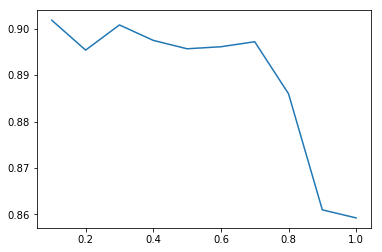

In [40]:
plt.plot(np.arange(.1,1.1,.1), accuracy)